## Problem Statment
Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

## Data Exploration Steps

In [1]:
# impoerting model
import pandas as pd

In [2]:
# Read Project-Data-Set-Repository-master/Data set/default_of_credit_card_clients.xls into df(DataFram)
df = pd.read_excel('/Data_Exploration_and_Cleaning/Data set/default_of_credit_card_clients.xls')

## Verifying Basic Data Integrity

In [3]:
# Check columns into df
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# Observe the first few rows of data
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#count unique values
df['ID'].nunique()


29687

In [6]:
#Obtain the number of rows
df.shape


(30000, 25)

In [7]:
#Store the value counts in a variable id_counts
id_counts = df['ID'].value_counts()

#Display the stored values 
id_counts.head()


7dbc4ebf-4b4f    2
7574bf9e-f3f9    2
af052d9b-f06b    2
168dcd08-0ed9    2
7b7cc3cd-0b76    2
Name: ID, dtype: int64

In [8]:
#Number of grouped duplicated entries
id_counts.value_counts()


1    29374
2      313
Name: ID, dtype: int64

## Boolean Masks


In [9]:
#Importing NumPy package
import numpy as np

In [10]:
#random numbers
np.random.seed(seed=24)


In [11]:
#Generate 100 random integers, chosen from between 1 and 5
random_integers = np.random.randint(low=1,high=5,size=100)


In [12]:
#Check locations of all elements of random_integers equal to 3
is_equal_to_3 = random_integers == 3


In [13]:
#Expect true and false
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [14]:
#Sum of a Boolean mask
sum(is_equal_to_3)


22

In [15]:
#Boolean masks can be used directly to index arrays
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## Continuing Verification of Data Integrity


In [16]:
#Assign the indices of the duplicated IDs to a variable 
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

7dbc4ebf-4b4f    True
7574bf9e-f3f9    True
af052d9b-f06b    True
168dcd08-0ed9    True
7b7cc3cd-0b76    True
Name: ID, dtype: bool

In [17]:
#Access the index 
id_counts.index[0:5]

Index(['7dbc4ebf-4b4f', '7574bf9e-f3f9', 'af052d9b-f06b', '168dcd08-0ed9',
       '7b7cc3cd-0b76'],
      dtype='object')

In [18]:
#Store the duplicated IDs in a new variable
dupe_ids = id_counts.index[dupe_mask]

#Convert dupe_ids to a list
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [19]:
#verify the data in dupe_ids
dupe_ids[0:5]


['7dbc4ebf-4b4f',
 '7574bf9e-f3f9',
 'af052d9b-f06b',
 '168dcd08-0ed9',
 '7b7cc3cd-0b76']

In [20]:
#Filtering the DataFrame in order
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5637,af052d9b-f06b,200000,1,2,2,29,0,0,0,0,...,49648,33498,30895,30035,10008,15011,5010,153,14100,0
5737,af052d9b-f06b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6757,7574bf9e-f3f9,30000,1,2,2,24,0,0,0,-1,...,517,25420,24863,1545,0,1517,25420,0,980,0
6857,7574bf9e-f3f9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7297,7dbc4ebf-4b4f,430000,1,1,1,40,-1,-1,-1,-1,...,417588,3414,4761,10590,31448,417588,3414,4761,15331,0
7397,7dbc4ebf-4b4f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Create a Boolean matrix 
df_zero_mask = df == 0


In [22]:
#Create the Boolean series feature_zero_mask
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

#Calculate the sum of the Boolean series
sum(feature_zero_mask)


315

In [23]:
#Clean the DataFrame by eliminating the rows with all zeros
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [24]:
#Verify the number of rows and columns in df_clean_1
df_clean_1.shape


(29685, 25)

In [25]:
#Obtain the number of unique IDs
df_clean_1['ID'].nunique()


29685

## Exploring and Cleaning the Data


In [26]:
#Obtain the data type of the columns in the data by using the .info()
df_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [27]:
#Use the .head(n) pandas method to view the top n rows of the PAY_1 series
df_clean_1['PAY_1'].head(5)


0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [28]:
#Obtain the value counts for the PAY_1 column by using .value_counts()
df_clean_1['PAY_1'].value_counts()


0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [29]:
#Use a logical mask with the != operator to find all the rows
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [30]:
#Check how many rows have no missing data by calculating the sum of the mask
sum(valid_pay_1_mask)


26664

In [31]:
#Clean the data by eliminating the rows with the missing values of PAY_1 
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [32]:
#Obtain the shape of the cleaned data
df_clean_2.shape


(26664, 25)

In [33]:
#check that the resulting DataFrame has the expected shape
df_clean_2['PAY_1'].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [34]:
#convert the data type for PAY_1 from object to int64 and show the column metadata for PAY_1 and PAY_2
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


## Data Quality Assurance and Exploration


In [35]:
#import plotting package
import matplotlib.pyplot as plt


## Exploring the Credit Limit and Demographic Features


In [36]:
#Render plotting automatically
%matplotlib inline

#Additional plotting functionality
import matplotlib as mpl 

#high resolution figures
mpl.rcParams['figure.dpi'] = 400 

In [37]:
#generate a tabular report of summary statistic
df_clean_2[['LIMIT_BAL', 'AGE']].describe()


,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [38]:
#obtain the value counts for the EDUCATION feature
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [39]:
#combine the undocumented levels of the EDUCATION feature into the level for "others"
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [40]:
#obtain the value counts for the MARRIAGE feature
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [41]:
#change the values of 0 in the MARRIAGE feature to 3 
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Deep Dive: Categorical Features


Text(0.5, 0, 'Education level: ordinal encoding')

<Figure size 400x400 with 0 Axes>

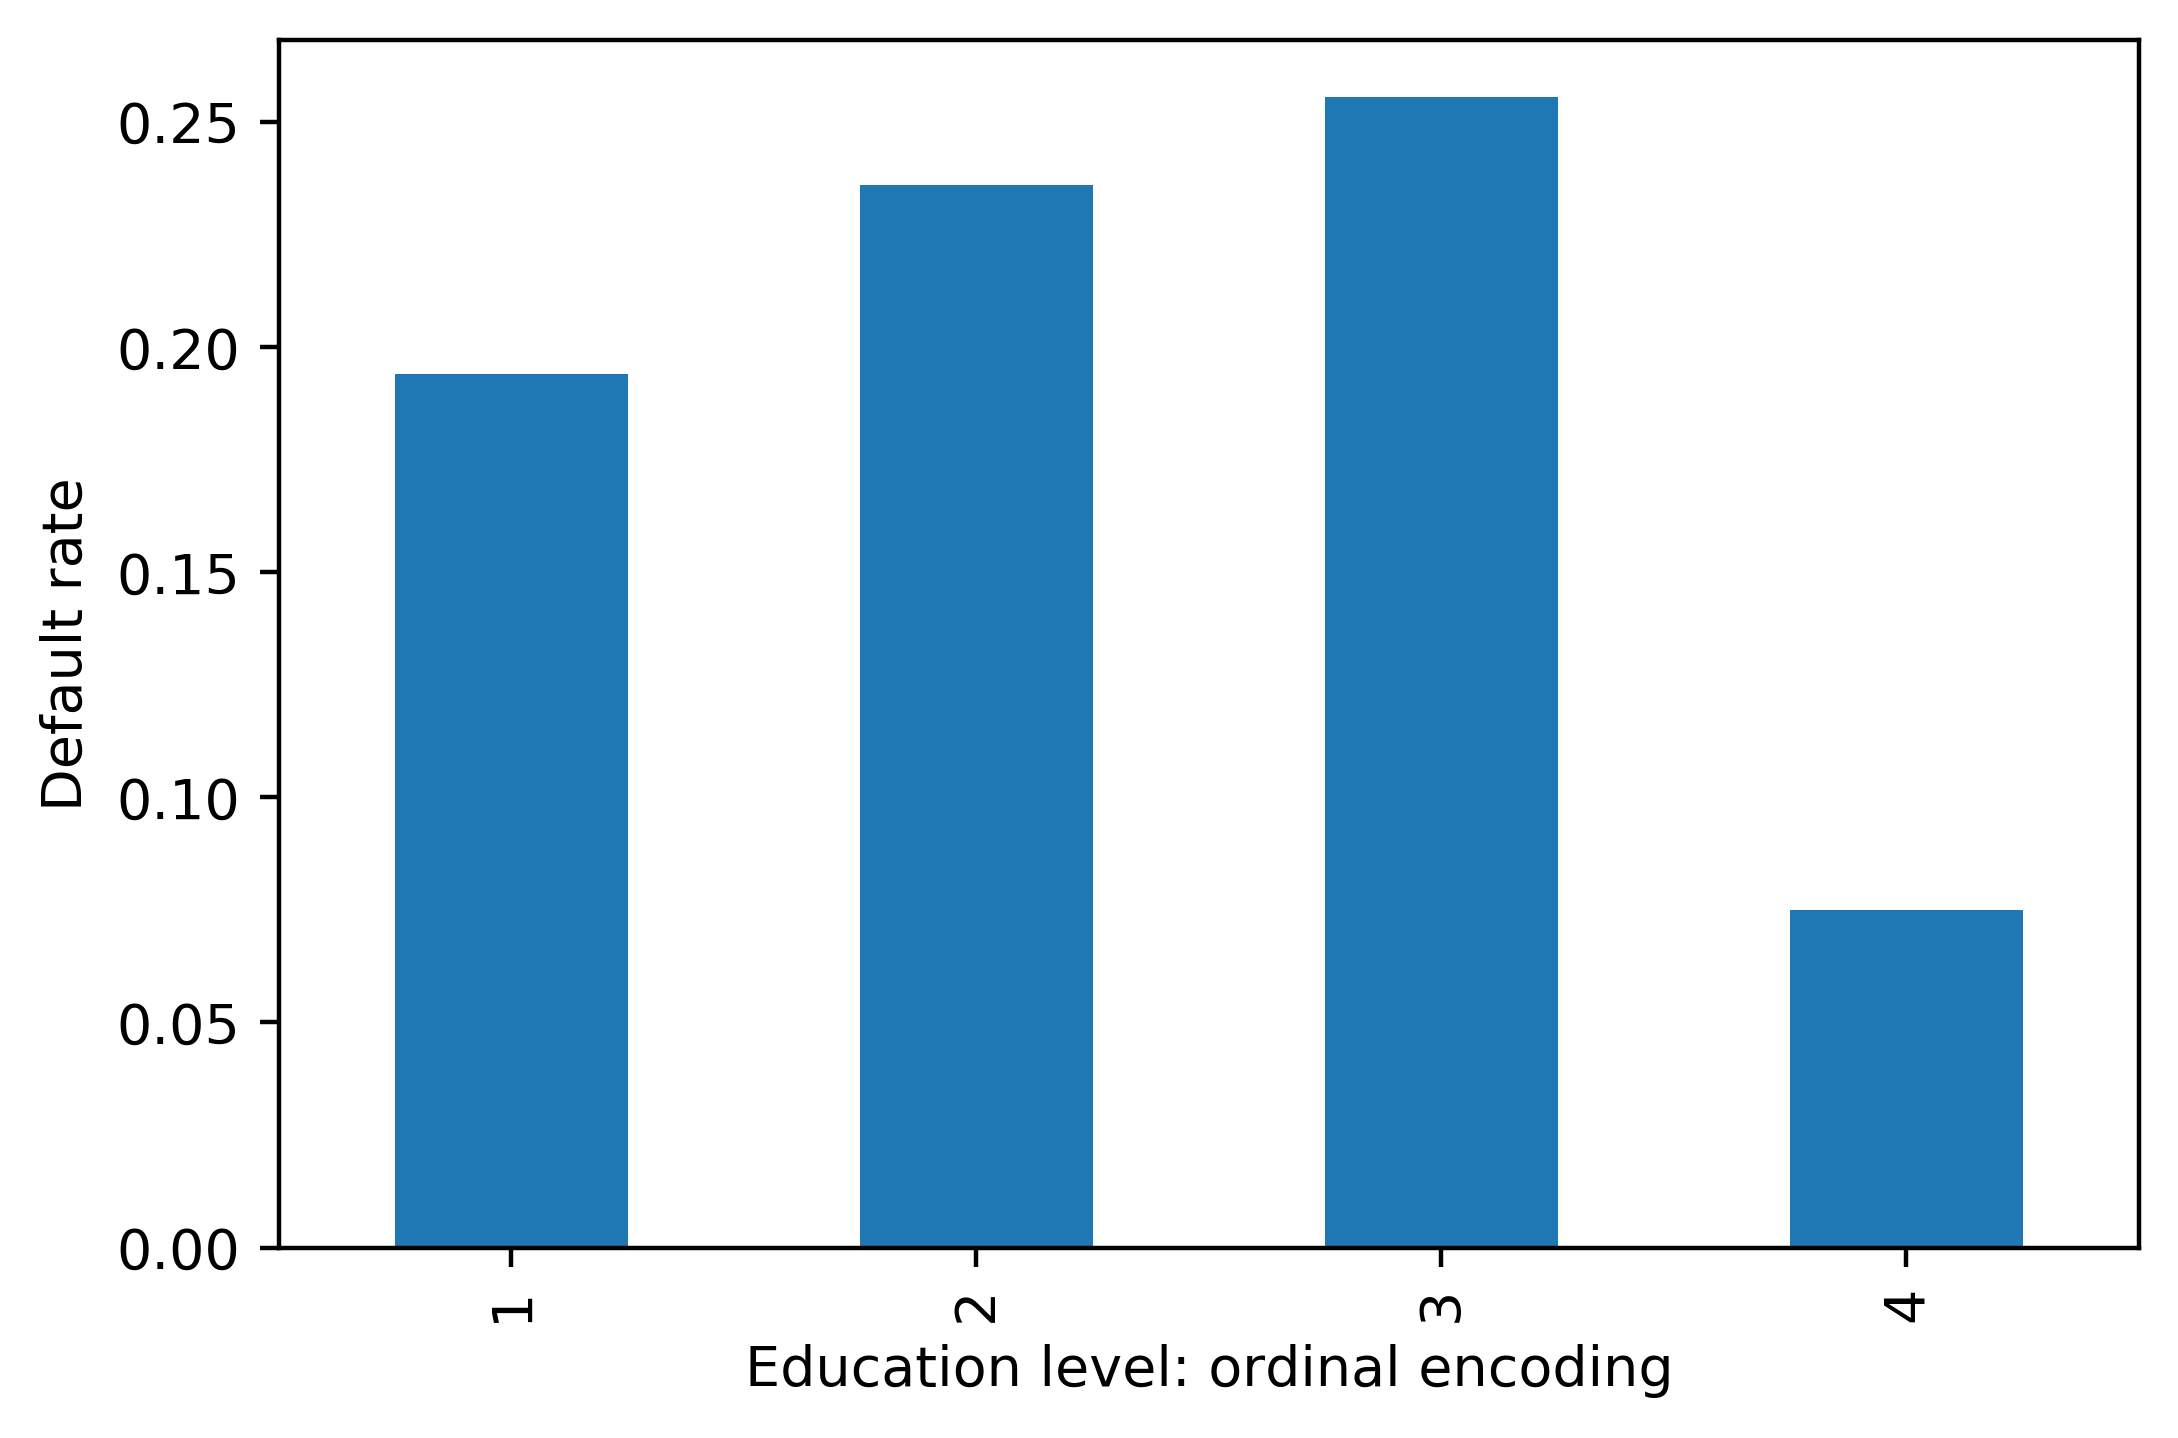

In [42]:
#Quickly look at rates using a groupby/agg and bar plot
plt.figure(figsize = (1,1))
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
#ordinal encoding will work well with a linear model
plt.xlabel('Education level: ordinal encoding')

## Implementing OHE for a Categorical Feature


In [43]:
#Create an empty column for the categorical labels called EDUCATION_CAT
df_clean_2['EDUCATION_CAT'] = 'none'


In [44]:
#Examine the first few rows of the DataFrame for the EDUCATION and EDUCATION_CAT columns
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [45]:
#create a dictionary that describes the mapping for education categories
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [46]:
#Original EDUCATION column using .map and assign the result to the new EDUCATION_CAT column
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [47]:
#create a one-hot encoded DataFrame of the EDUCATION_CAT column
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)


,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [48]:
#concatenate the one-hot encoded DataFrame to the original DataFrame
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [49]:
#write the latest DataFrame to a CSV (comma-separated value) 
df_with_ohe.to_csv('cleaned_data.csv', index=False)

## Exploring the Financial History Features in the Dataset


In [50]:
df = pd.read_csv('cleaned_data.csv')

In [51]:
#Convenient payment statuses to break these out as a list
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [52]:
#use the .describe method on these six Series to descriptive statistics
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [53]:
#Check again at the value_counts() of PAY_1 and sorted by the values in index 
df[pay_feats[0]].value_counts().sort_index()


-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

## Exploring the Financial History Features and Histograms


In [54]:
#create an array in bins, each one centered around one of the unique values of PAY_1
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

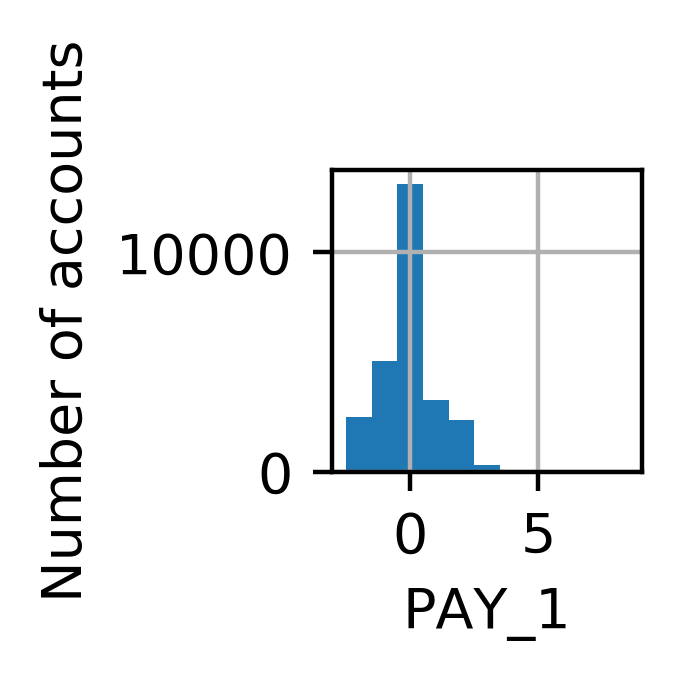

In [55]:
#Use the xlabel and ylabel functions in matplotlib to add axis labels to this plot 
plt.figure(figsize = (1,1))
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000824CEC888>,
      dtype=object)

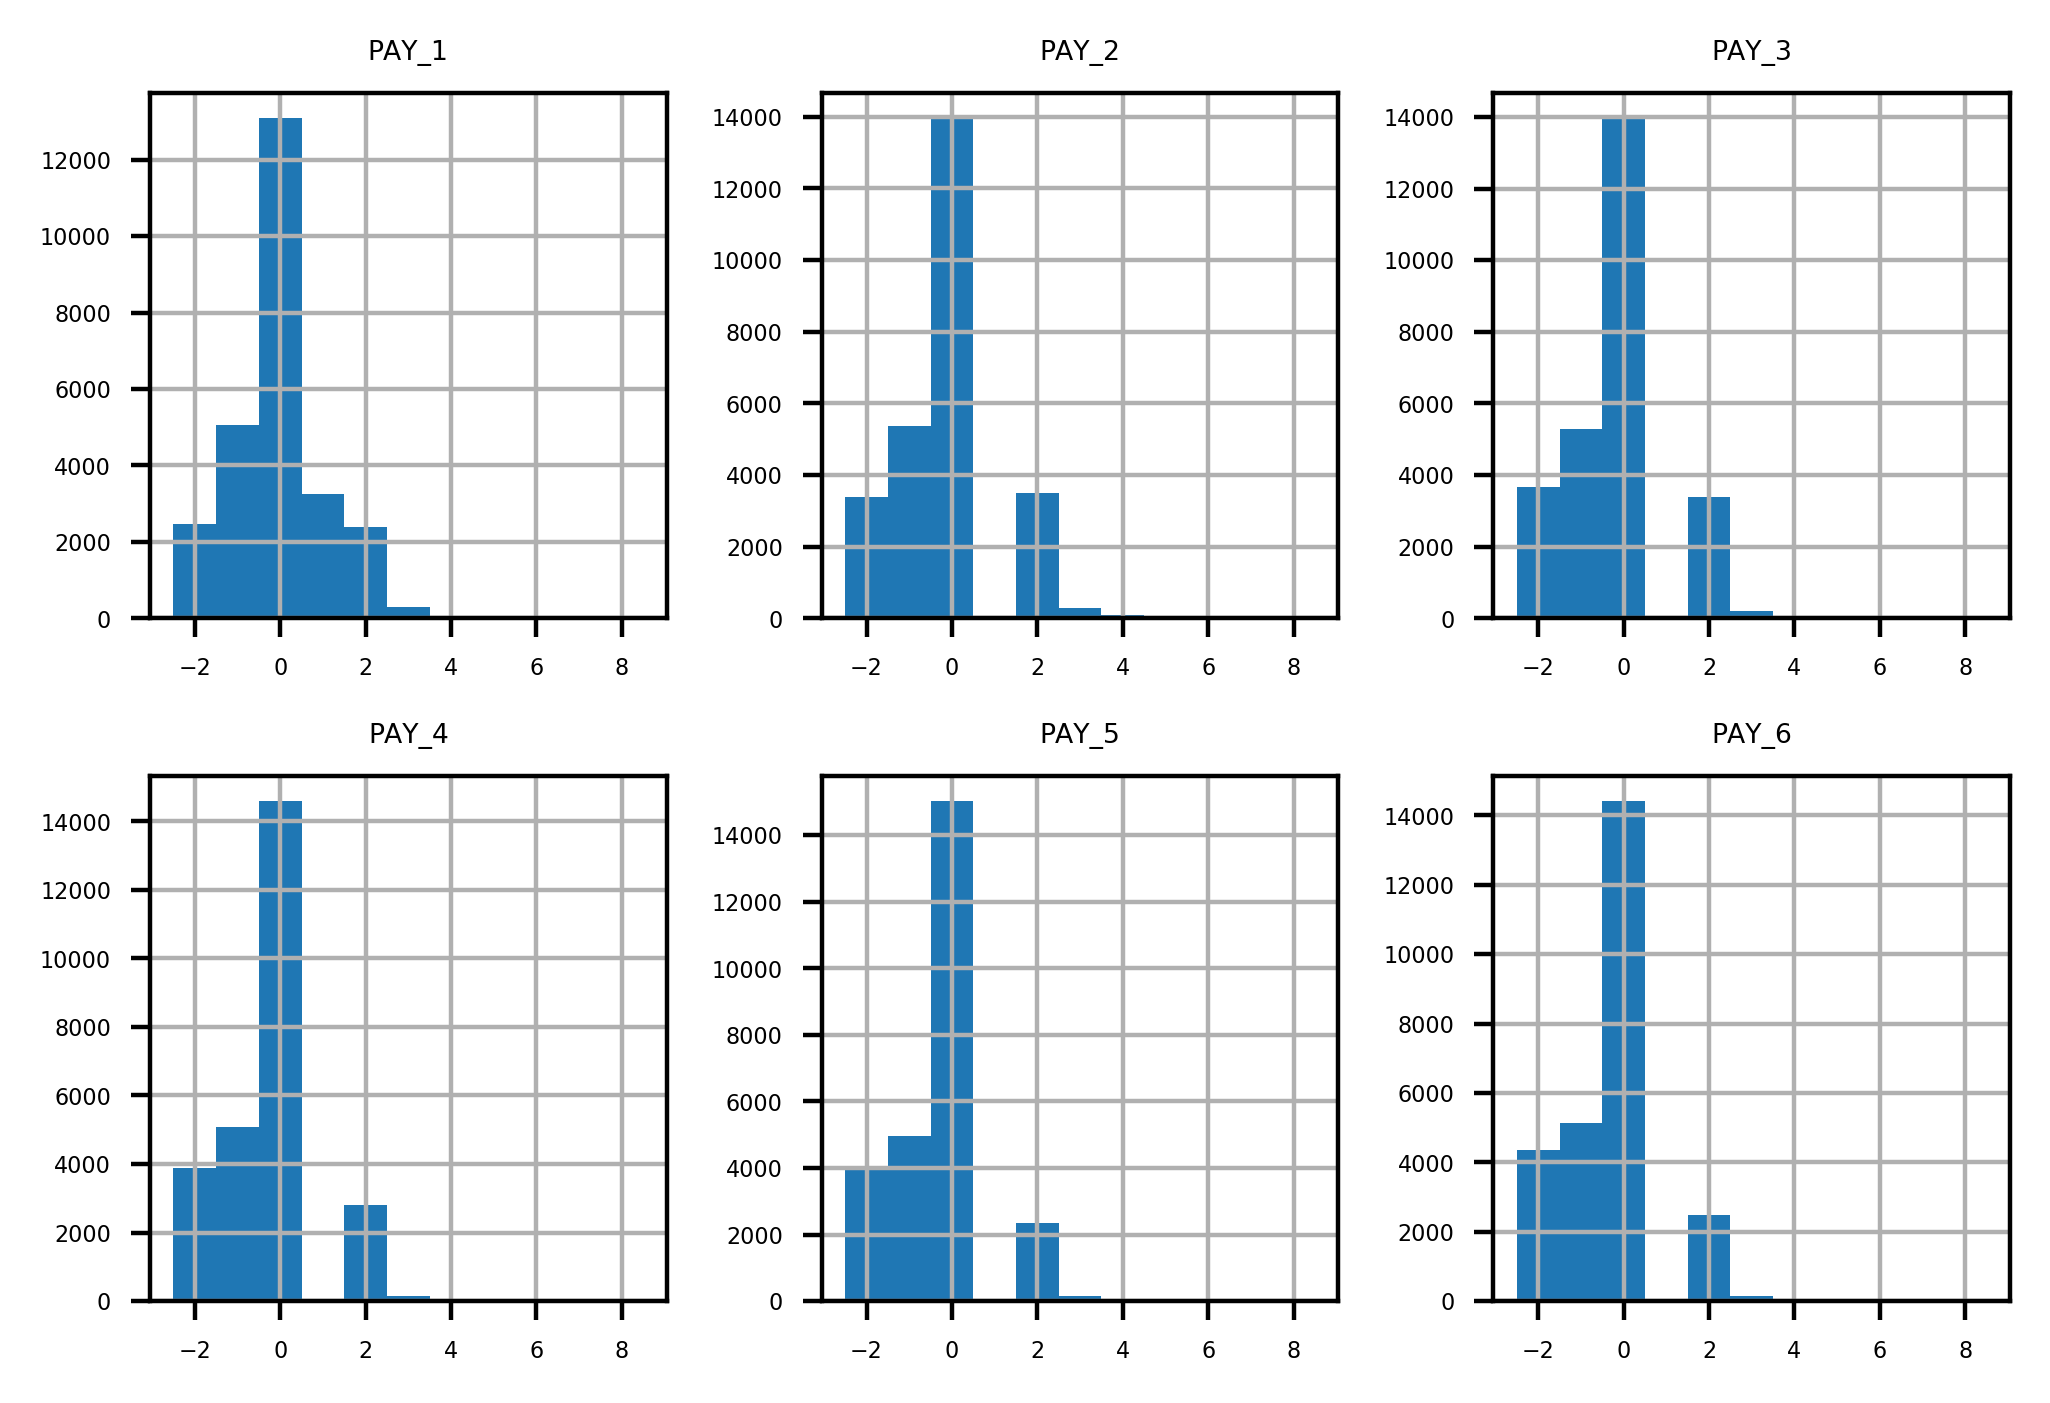

In [56]:
#Set the font size small enough to fit between these subplots
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [57]:
#Ceack accounts with a 2-month delay in August and see what the payment status was in July
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
